In [19]:
# -*- coding: utf-8 -*-

# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
font_path ="./gulim.ttc"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('시도별 전출입 인구수.xlsx', fillna=0, header=0)

# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 '충청남도','경상북도', '강원도'로 이동한 인구 데이터 값만 선택
col_years = list(map(str, range(1970, 2018)))
df_3 = df_seoul.loc[['충청남도','경상남도', '전라남도'], col_years]
print(df_3)

       1970   1971   1972   1973   1974   1975   1976   1977   1978   1979  \
전입지                                                                          
충청남도  15954  18943  23406  27139  25509  51205  41447  43993  48091  45388   
경상남도   8409  10001  11263  15193  16771  23150  22400  27393  28697  30183   
전라남도  10513  16755  20157  22160  21314  46610  46251  43430  44624  47934   

      ...   2008   2009   2010   2011   2012   2013   2014   2015   2016  \
전입지   ...                                                                  
충청남도  ...  27458  24889  24522  24723  22269  21486  21473  22299  21741   
경상남도  ...  15438  15303  15689  16039  14474  14447  14799  15220  13717   
전라남도  ...  16601  17468  16429  15974  14765  14187  14591  14598  13065   

       2017  
전입지          
충청남도  21020  
경상남도  12692  
전라남도  12426  

[3 rows x 48 columns]


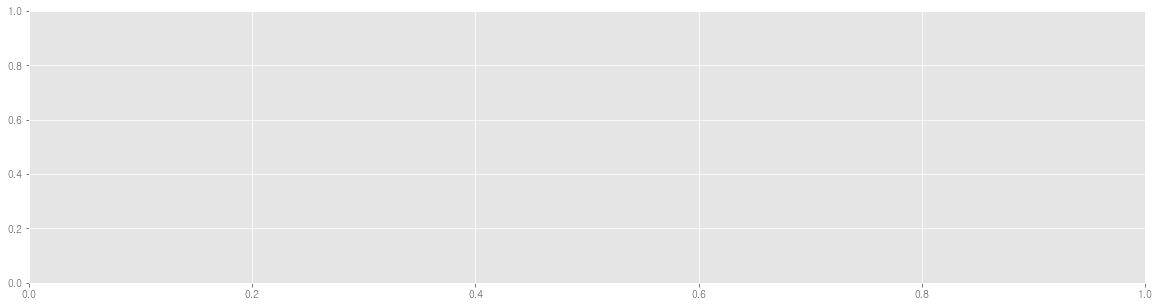

In [20]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 5))   
ax = fig.add_subplot(1, 1, 1)

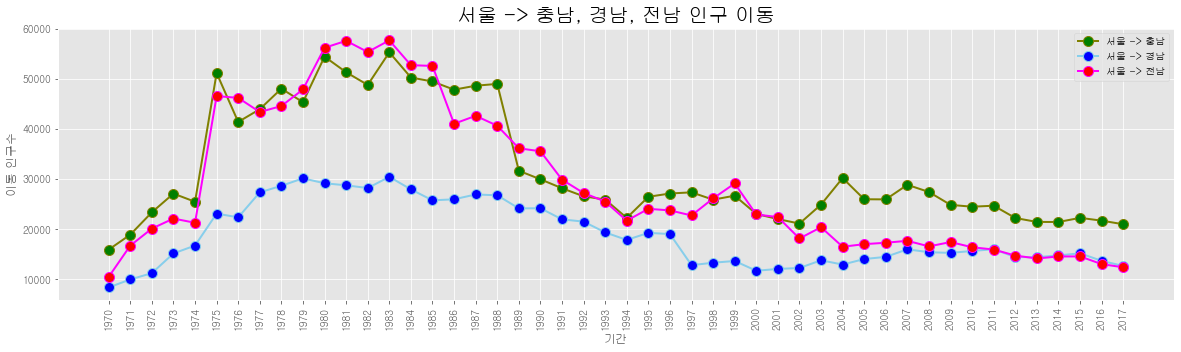

In [24]:
# 스타일 서식 지정
plt.style.use('ggplot') 

# 그래프 객체 생성 (figure에 1개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20, 5))   
ax = fig.add_subplot(1, 1, 1)
# axe 객체에 plot 함수로 그래프 출력
ax.plot(col_years, df_3.loc['충청남도',:], marker='o', markerfacecolor='green', 
        markersize=10, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df_3.loc['경상남도',:], marker='o', markerfacecolor='blue', 
        markersize=10, color='skyblue', linewidth=2, label='서울 -> 경남')
ax.plot(col_years, df_3.loc['전라남도',:], marker='o', markerfacecolor='red', 
        markersize=10, color='magenta', linewidth=2, label='서울 -> 전남')
# 범례 표시
ax.legend(loc='best')

# 차트 제목 추가
ax.set_title('서울 -> 충남, 경남, 전남 인구 이동', size=20)

# 축이름 추가
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size = 12)

# 축 눈금 라벨 지정 및 90도 회전
ax.set_xticklabels(col_years, rotation=90)

# 축 눈금 라벨 크기
ax.tick_params(axis="x", labelsize=10)
ax.tick_params(axis="y", labelsize=10)



plt.show()  # 변경사항 저장하고 그래프 출력